In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1 . Data : information and summary 

https://www.kaggle.com/yoghurtpatil/direct-marketing

Age (of customer; old/middle/young);
 
 Gender (male/female);

  OwnHome (whether customer owns home; yes/no);
 
  Married (single/married);
 
  Location (far/close;in terms of distance to the nearest brick and mortar store that sells similar products);
 
  Salary (yearly salary of customer; in dollars);
 
  Children (number of children; 0–3); 
 
  History (of previous purchase volume; low/medium/high/NA; 
 
  NA means that this customer has not yet purchased); 
 
  Catalogs (number of catalogs sent);
 
  AmountSpent (in dollars).

## 2. Data Cleaning 

In [ ]:
df = pd.read_csv('/content/DirectMarketing.csv')
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [ ]:
df.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children        int64
History        object
Catalogs        int64
AmountSpent     int64
dtype: object

In [ ]:
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [ ]:
# Since NA in the column means no history - we will make it a fourth category
df.History.fillna(value = 'NH' , inplace = True)

## EDA

In [ ]:
df.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000
std,30616.314826,1.05107,6.622895,961.068613
min,10100.000000,0.00000,6.000000,38.000000
25%,29975.000000,0.00000,6.000000,488.250000
50%,53700.000000,1.00000,12.000000,962.000000
75%,77025.000000,2.00000,18.000000,1688.500000
max,168800.000000,3.00000,24.000000,6217.000000


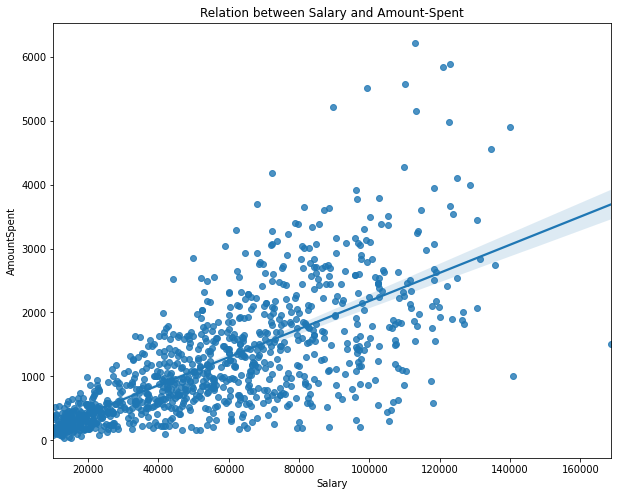

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x='Salary' , y='AmountSpent',data = df)
plt.title('Relation between Salary and Amount-Spent')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


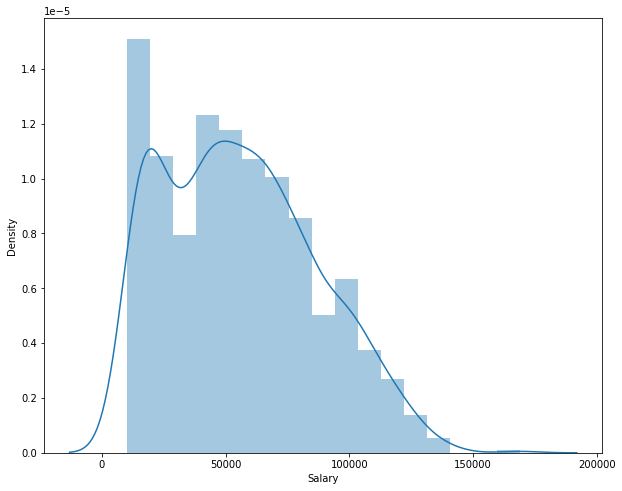

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df.Salary)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


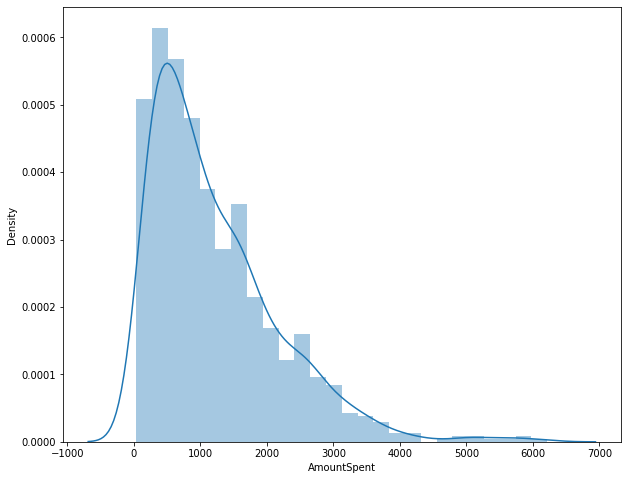

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df.AmountSpent)
plt.show()

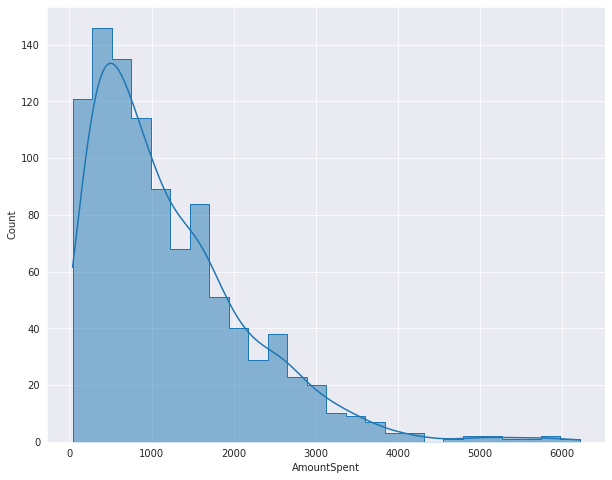

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style(style= 'darkgrid')
sns.histplot(df.AmountSpent, kde =True , element= 'step')
plt.show()

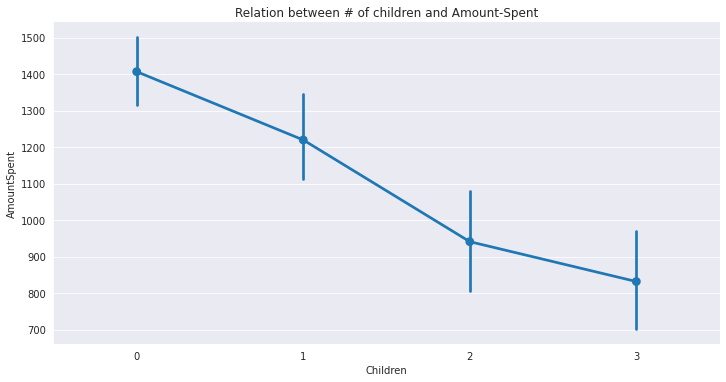

In [ ]:
sns.catplot(x='Children' , y='AmountSpent',kind= 'point',data = df , aspect= 2)
plt.title('Relation between # of children and Amount-Spent')
plt.show()

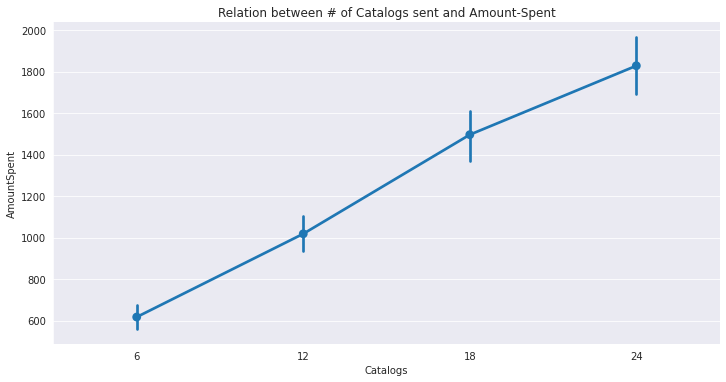

In [ ]:
sns.catplot(x='Catalogs' , y='AmountSpent',kind= 'point',data = df , aspect= 2)
plt.title('Relation between # of Catalogs sent and Amount-Spent')
plt.show()

In [ ]:
cols = df.select_dtypes('object').columns
for c in cols:
  print(c,' :',df[c].unique())

Age  : ['Old' 'Middle' 'Young']
Gender  : ['Female' 'Male']
OwnHome  : ['Own' 'Rent']
Married  : ['Single' 'Married']
Location  : ['Far' 'Close']
History  : ['High' 'Low' 'Medium' 'NH']


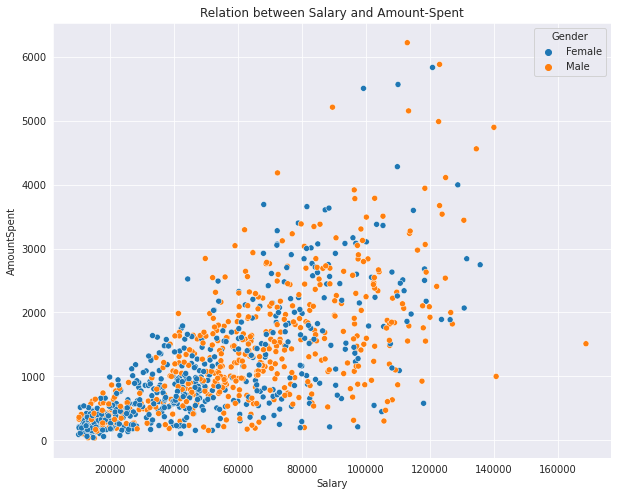

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Salary' , y='AmountSpent',hue = 'Gender' ,data = df)
plt.title('Relation between Salary and Amount-Spent')
plt.show()

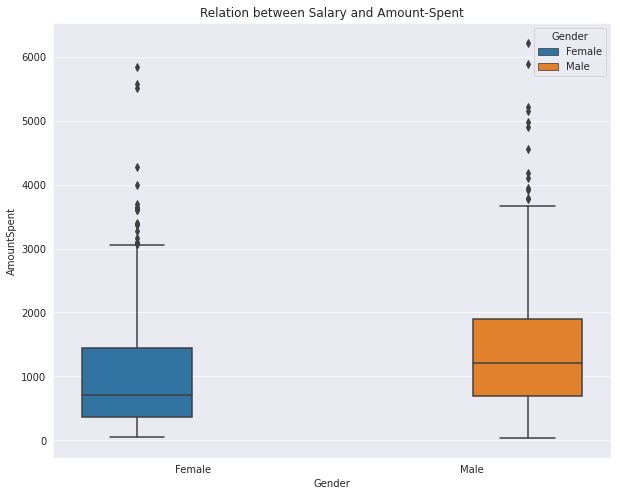

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Gender' , y='AmountSpent',hue = 'Gender' ,data = df)
plt.title('Relation between Gender and Amount-Spent')
plt.show()

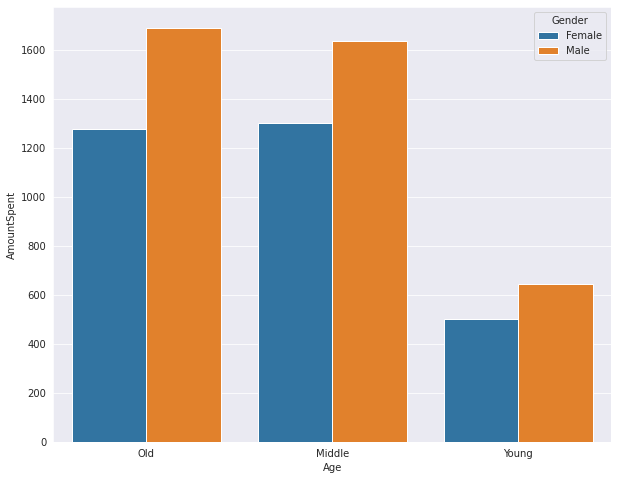

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Age' , y ='AmountSpent', hue='Gender' ,ci=False, data =df)
plt.show()

In [ ]:
!pip install --upgrade plotly


     |████████████████████████████████| 19.1MB 1.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.express as px
ax = px.treemap(df , path=['Location','Married','OwnHome'], values = 'AmountSpent')
ax.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



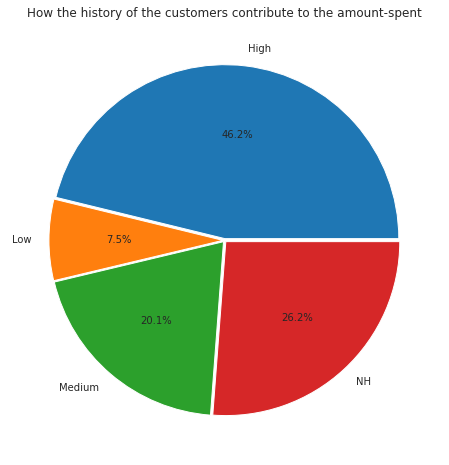

In [ ]:
pie_df = df[['History','AmountSpent']]
pie_df = pie_df.groupby(by='History').mean()
plt.figure(figsize=(8,8))
plt.pie(pie_df,autopct="%.1f%%" ,explode=[0.01]*4 ,labels =pie_df.index)
plt.title('How the history of the customers contribute to the amount-spent')
plt.show()

##3. Feature engineering

In [ ]:
cols = df.select_dtypes('object').columns
for c in cols:
  print(c,' :',df[c].unique())

Age  : ['Old' 'Middle' 'Young']
Gender  : ['Female' 'Male']
OwnHome  : ['Own' 'Rent']
Married  : ['Single' 'Married']
Location  : ['Far' 'Close']
History  : ['High' 'Low' 'Medium' 'NH']


Encoding categorical variables

In [ ]:
#all these are binary variables so we can use label encoder which will give 0 and 1 
#Gender
from sklearn.preprocessing import LabelEncoder
gender_le = LabelEncoder()
df.Gender = gender_le.fit_transform(df.Gender)

#OneHome
home = LabelEncoder()
df.OwnHome = home.fit_transform(df.OwnHome)

#Married
married_le = LabelEncoder()
df.Married = married_le.fit_transform(df.Married)

#location
loc = LabelEncoder()
df.Location = loc.fit_transform(df.Location)

In [ ]:
#now for age and history which are more than 2 and ordinal
#we will use one hot encoding

#Age
encoded = pd.get_dummies(df.Age)
df.drop(columns= 'Age',axis =1,inplace = True)
df = df.join(encoded)
df

#Age
encoded = pd.get_dummies(df.History)
df.drop(columns= 'History',axis =1,inplace = True)
df = df.join(encoded)
df

,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent,Middle,Old,Young,High,Low,Medium,NH
0,0,0,1,1,47500,0,6,755,0,1,0,1,0,0,0
1,1,1,1,0,63600,0,6,1318,1,0,0,1,0,0,0
2,0,1,1,0,13500,0,18,296,0,0,1,0,1,0,0
3,1,0,0,0,85600,1,18,2436,1,0,0,1,0,0,0
4,0,0,1,0,68400,0,12,1304,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,19400,1,18,384,0,0,1,0,0,0,1
996,1,1,1,1,40500,1,18,1073,1,0,0,0,0,0,1
997,1,0,1,0,44800,0,24,1417,0,1,0,0,0,1,0
998,1,0,0,0,79000,2,18,671,1,0,0,0,0,1,0


since Salary,Amountspent,Catalogs,children are of different ranges

we can scale it using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Salary','Children','Catalogs','AmountSpent']] = sc.fit_transform(df[['Salary','Children','Catalogs','AmountSpent']].values)

In [ ]:
print('Fully Cleaned and ready to fit data :')
df.head(10)

Fully Cleaned and ready to fit data :


,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent,Middle,Old,Young,High,Low,Medium,NH
0,0,0,1,1,-0.281164,-0.889063,-1.311563,-0.480716,0,1,0,1,0,0,0
1,1,1,1,0,0.244963,-0.889063,-1.311563,0.105383,1,0,0,1,0,0,0
2,0,1,1,0,-1.392239,-0.889063,0.501240,-0.958548,0,0,1,0,1,0,0
3,1,0,0,0,0.963893,0.062825,0.501240,1.269254,1,0,0,1,0,0,0
4,0,0,1,0,0.401820,-0.889063,-0.405161,0.090809,1,0,0,1,0,0,0
5,1,0,0,0,-0.839969,-0.889063,-1.311563,-0.751384,0,0,1,0,1,0,0
6,0,1,1,0,-0.261557,-0.889063,-0.405161,-0.452608,1,0,0,0,0,1,0
7,1,0,1,0,0.401820,-0.889063,0.501240,-0.064304,1,0,0,1,0,0,0
8,0,0,0,0,-0.137378,1.966599,-1.311563,-1.102210,1,0,0,0,1,0,0
9,1,0,0,1,0.803768,-0.889063,0.501240,1.891789,0,1,0,0,0,0,1


##4. Hypothesis Testing

1 . Fit a Simple Linear regression model taking salary as the regressor and with a sample of n = 50  to the data and test the significanse of regression : 

    Ho :- B1 = 0 There is no significance of regression
    Ha :- B1!=0 There is significane of regression , where B1 is coefficient  




In [ ]:
reg_df = df.sample(50)

In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
Y = reg_df['AmountSpent'].values
X = reg_df['Salary'].values.reshape(-1,1)

regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X)

In [ ]:
# f_statistic = (SSR/#regressors(k)) / (SSE/ n - #no of parameters (k+1))
#SSR = sum(ymean - y_pred**2)
#SSE = sum((y_true - y_pred)**2)

SSR = sum((y_pred - Y.mean())**2)
SSE = sum((Y - y_pred)**2)

f_stat = (SSR/1) / (SSE/(50-2))
f_stat

42.218881760597625

In [ ]:
import scipy.stats as ss
ss.f.ppf(0.05,1,50-2)

0.0039734750402595645

2. From a sample of 25 observations of amount spent,
   test the hypothesis that :
        Ho : Population mean is equal to 1216$ : Mu = 1216$
        Ha : Population mean is not equal to 1216$    : Mu != 1216$
        Use 0.05 significance level 

In [ ]:
df[['Salary','Children','Catalogs','AmountSpent']] = sc.inverse_transform(df[['Salary','Children','Catalogs','AmountSpent']].values)

In [ ]:
sample = df.AmountSpent.sample(25)
x_bar = sample.mean()
mu = df.AmountSpent.mean()
s = sample.std()
print('x bar :',x_bar)
print('pop mean :',mu)

x bar : 1326.36
pop mean : 1216.77


In [ ]:
#t_stat 
t = (x_bar - mu) /(s/25**0.5)
t

-0.29126495842482547

In [ ]:
print(ss.t.ppf(0.25,24),'<',t,'<',ss.t.ppf(1-0.25,24))

-0.6848496281662989 < -0.29126495842482547 < 0.6848496290936935


3. The variance of the salary of customers was studied using samples of 20 men and 24 women, and the info obtained was :


In [ ]:
sample_A = df[df['Gender']==1].Salary.sample(20)
print('sample of 20 men:  mean =',sample_A.mean(),' variance =',sample_A.var())

sample of 20 men:  mean = 64590.0  variance = 1023062000.0


In [ ]:
sample_B = df[df['Gender']==0].Salary.sample(24)
print('sample of 24 women:  mean =',sample_B.mean(),' variance =',sample_B.var())

sample of 24 women:  mean = 44979.166666666664  variance = 798585199.2753624


Test with 5% significance whether there is a significant difference in variance salary of customers with respect to their gender 
      
      Ho : sigma_A ^2 = sigma_B ^2 : There is no signifant difference
      Ha : sigma_A ^2 > sigma_B ^2 : variance of salary of men is greater than women


In [ ]:
n1 = 20
n2 = 24
S1_sqr = sample_A.var()
S2_sqr = sample_B.var()

F = S1_sqr / S2_sqr
F

1.2810931143331084

In [ ]:
ss.f.ppf(0.05,19,23)

0.4709733026219151